In [13]:
import plotly.graph_objects as go
import seaborn as sns

### [Q1.] Load the "titanic" dataset using the load_dataset function of seaborn. Use Plotly express to plot a sctter plot for age and fare columns in the titanic dataset.

##### [Ans]

In [14]:
TITANIC = sns.load_dataset("titanic")
TITANIC.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=TITANIC.age , y=TITANIC.fare , mode="markers"))
fig.update_layout(titles="SCATTER PLOT OF AGE BY FARE"
                 xaxis_title="AGE"
                 yaxis_title="FARE")
fig.show()

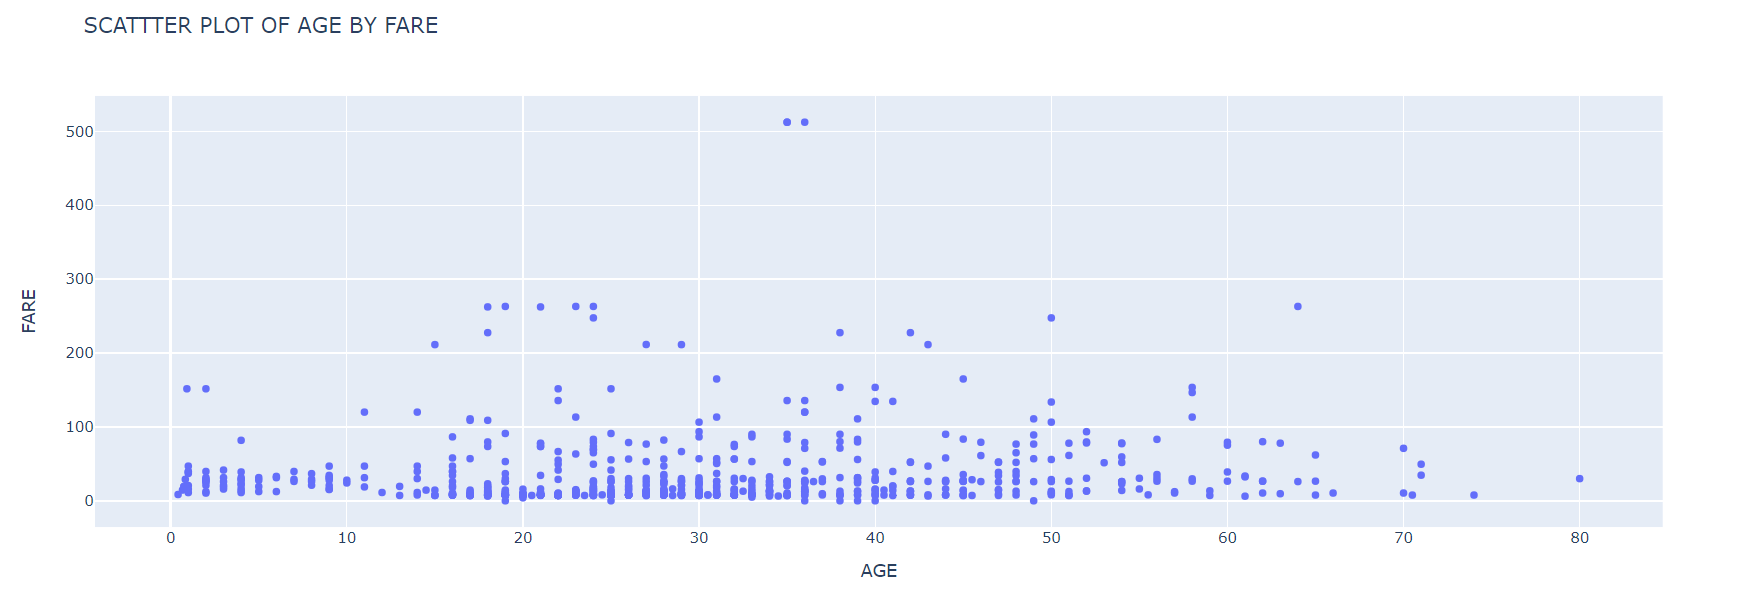

### [Q2.] Using the tips dataset in the Plotly library, plot a box plot using Plotly express.

##### [Ans]

In [23]:
TIPS = sns.load_dataset("tips")
TIPS.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(x=TIPS['sex'] , y=TIPS['total_bill'] , name="Total Bill"))
fig.update_layout(title="BOX PLOT OF TOTAL BILL BY SEX",
                  xaxis_title="SEX",
                  yaxis_title="TOTAL BILL")
fig.show()

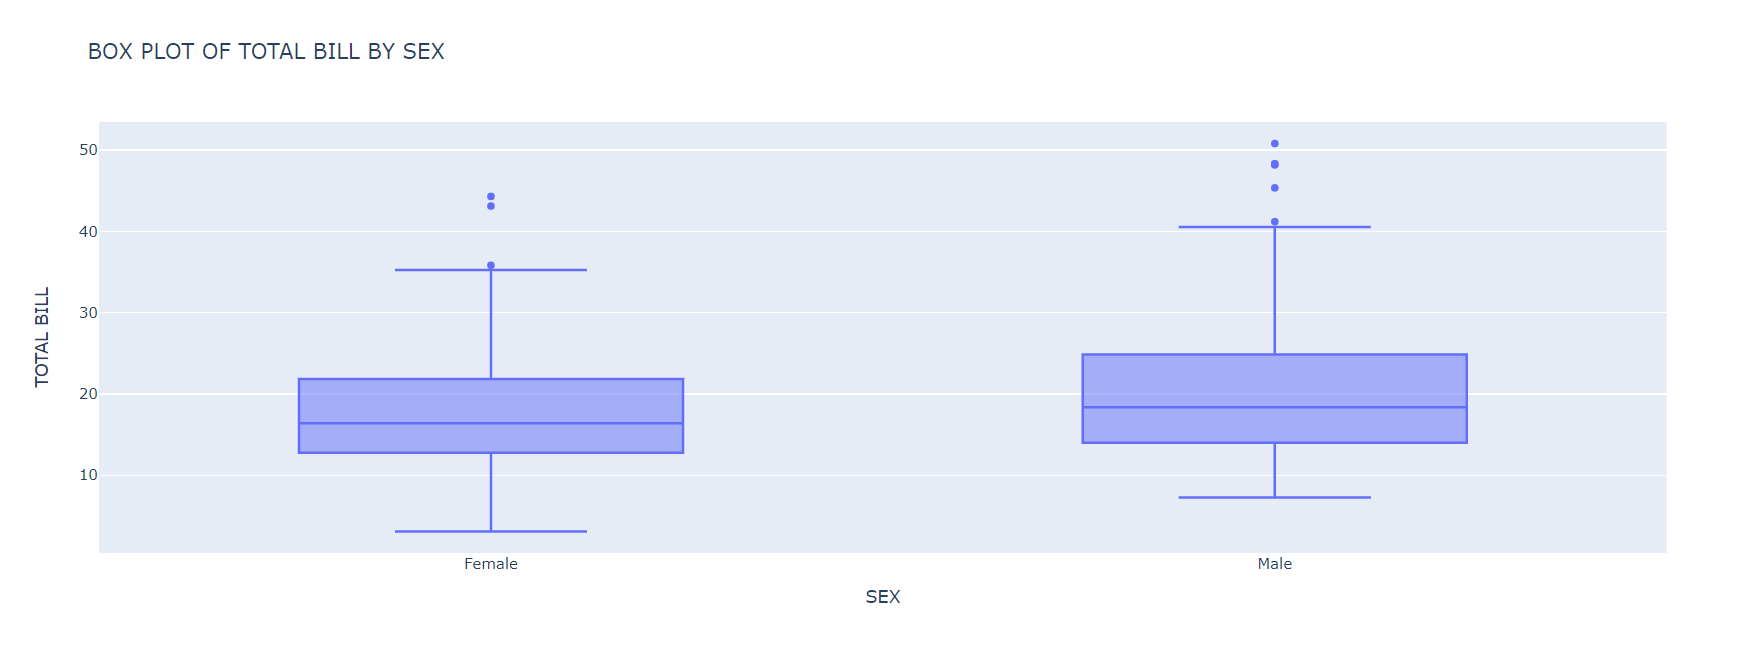

### [Q3.] Using the tips dataset in the Plotly library, Plot a histogram for x= "sex" and y="total_bill" column in the tips dataset. Also, use the "smoker" column with the pattern_shape parameter and the "day" column with the color parameter.
##### [Ans]

In [24]:
TIPS.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
fig = go.Figure([go.Histogram(x=TIPS['sex'], y=TIPS['total_bill'])])

# Define marker patterns for 'smoker' values
marker_pattern_shape = {
    'Yes': ".",  # Use '.' for 'Yes'
    'No': "\\"   # Use '\' for 'No'
}

# Define color map for 'day' values
day_color_map = {
    'Thur': 'blue',
    'Fri': 'green',
    'Sat': 'orange',
    'Sun': 'red'
}

# Add each data point with appropriate marker pattern and color
for i, smoker_value in enumerate(TIPS["smoker"]):
    day_value = TIPS["day"][i]
    fig.add_trace(
       go.Bar(
            x=[TIPS['sex'][i]],
            y=[TIPS['total_bill'][i]],
            marker_pattern_shape=marker_pattern_shape[smoker_value],
            marker_color=day_color_map[day_value]
        )
    )
fig.update_layout(title="HISTOGRAM OF TOTAL BILL BY SEX",
                  xaxis_title="SEX",
                  yaxis_title="TOTAL BILL")
fig.show()

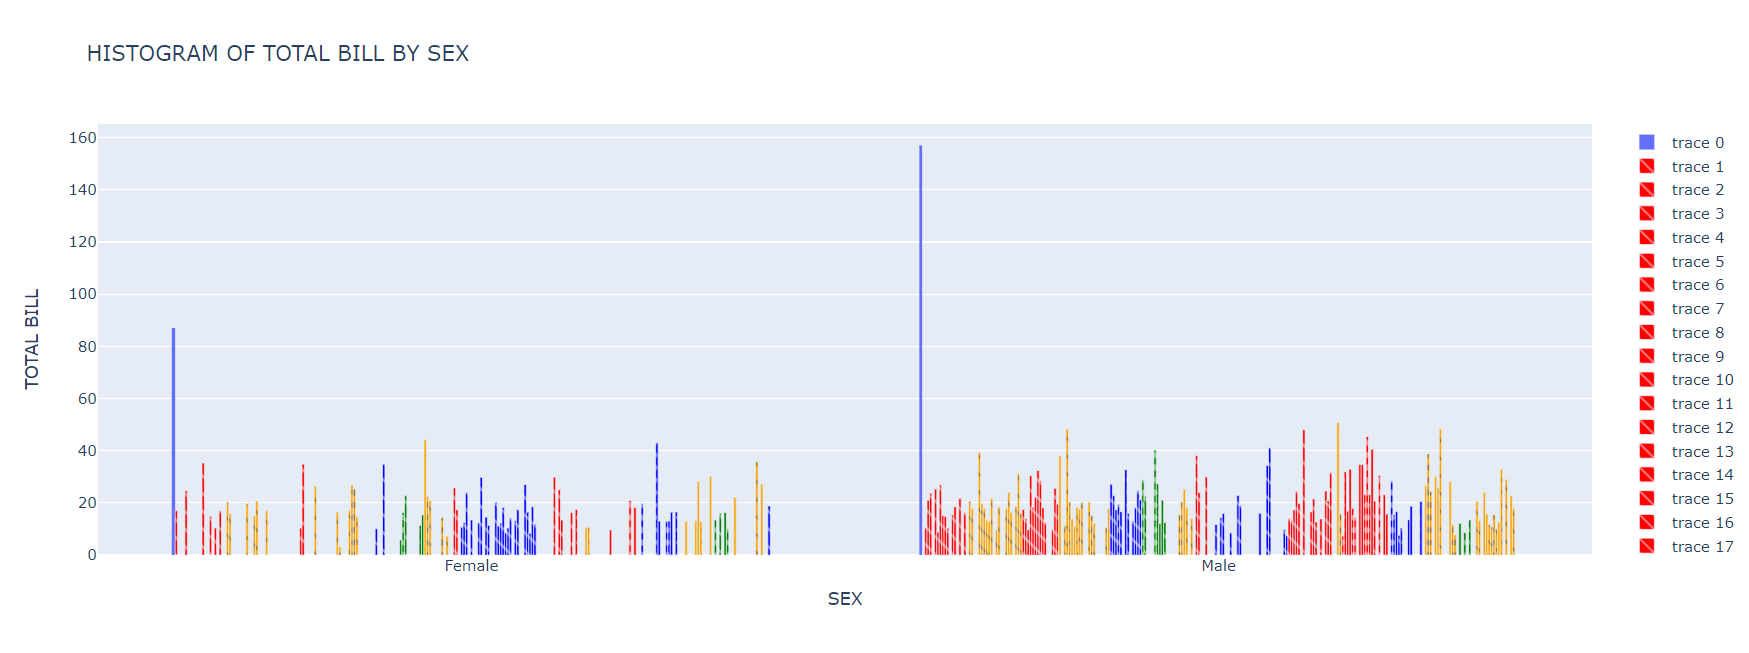

### [Q4.] Using the iris dataset in the Plotly library, Plot a scatter matrix plot, using the "species" column for the color parameter.
#### Note: Use "sepal_length", "sepal_width", "petal_length", "petal_width" columns only with the dimensions parameter.
##### [Ans]

In [28]:
IRIS = sns.load_dataset('iris')
IRIS.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dimensions = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length']

fig = go.Figure()

for i in range(len(dimensions)):
    for j in range(len(dimensions)):
        fig.add_trace(
            go.Scatter(
                x=IRIS[dimensions[i]],
                y=IRIS[dimensions[j]],
                mode='markers',
                marker=dict(color=IRIS['species'].astype('category').cat.codes,
                            colorscale='Viridis', showscale=False),
                showlegend=False
            )
        )
fig.update_layout(title="SCATTER MATRIX PLOT")
fig.show()

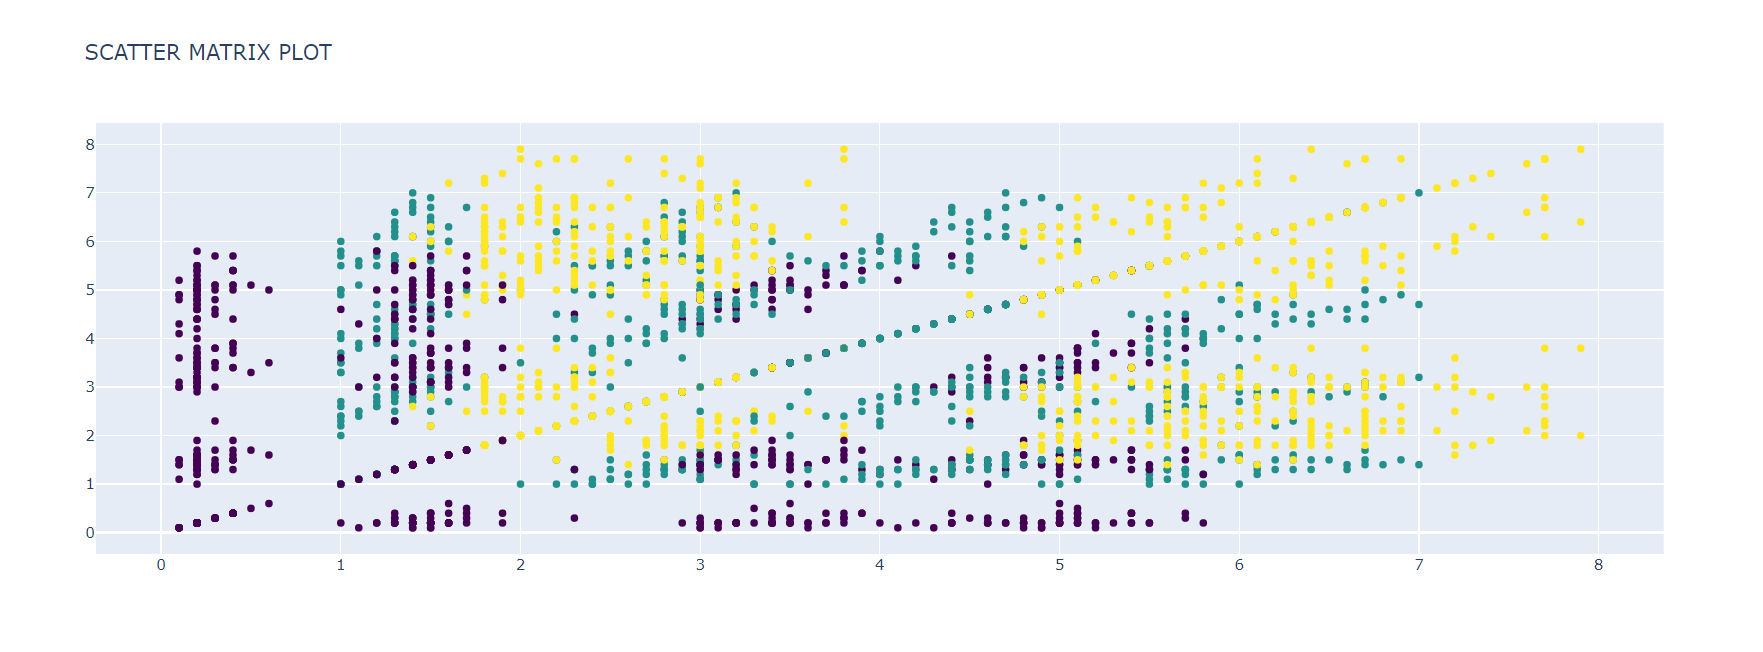

### [Q5.] What is Distplot? Using Plotly express, plot a distplot.

##### [Ans]

Distplot is a function from the Seaborn library that used to create a histogram combined with a KDE (Kernel Density Estimate) plot. However, it has been deprecated, and the recommended way to create similar plots now is to use histplot for the histogram and kdeplot for the KDE plot in Seaborn.

In [ ]:
data = [1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9]

fig = go.Figure()

fig.add_trace(go.Histogram(x=data, nbinsx=10, histnorm='probability', name='Histogram'))

fig.add_trace(go.Scatter(x=data, y=fig['data'][0].y, mode='lines', line_shape='spline', name='KDE'))

fig.update_layout(title="DISPLOT WITH HISTOGRAM AND KDE", xaxis_title='Value', yaxis_title='Density')

fig.show()

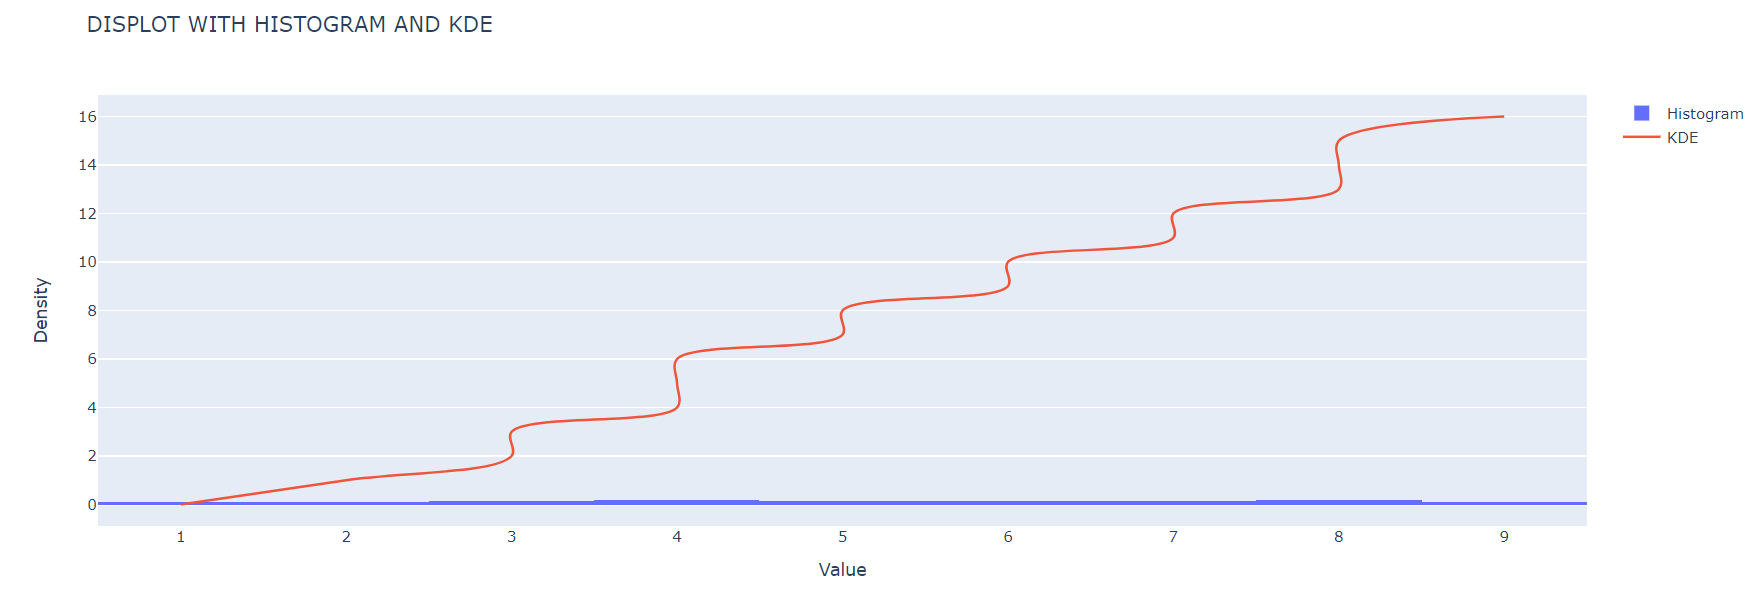